## TensorFlow:
TensorFlow is the most popular and adopted free and open-source deep learning library. It was first developed and maintained by Google. It can be used for both research and production.

## **TensorFlow benefits:**
- Highly efficient
- Cross-platform (works on IOS, Android, Unix, Windows, in the cloud, in the browser etc etc)
- Calculates gradients automatically (this is truly useful for Neural Networks, where the analytical solution of gradients would be VERY tedious to derive).
* Deep integration with the Keras library (Functional approach, as well as high-level wrapper)

# General notebook setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Install TensorFlow 2.0

TensorFlow 2.x is a major change from TensorFlow 1.x (not backwards compatible, however you can use a tool to convert your TensorFlow 1.x code to 2.x).

The new version is designed to be more pythonic. It's  easier to debug models, extract values during training (because of the need of sessions and graphs in TensorFlow 1.x). 

TensorFlow 2.x supports eager execution by default, so you don't need a session and to evaluate operations / tensors in order to extract values.

In [ ]:
#!pip install tensorflow
# or for GPU version:
# !pip install tensorflow-gpu

# Import TensorFlow

In [2]:
# Canonical way of importing TensorFlow
import tensorflow as tf

# If this doesn't work TensorFlow is not installed correctly

# TensorFlow 2.0
At the time of the update of this notebook we are still in the early days of TensorFlow, and currently (Oct 22) the version 2.0.0 has just been released.

In [3]:
# Check tf version, oftentimes tensorflow is not backwards compatible
tf.__version__

# should be tensorflow 2

'2.0.0'

# Intro to TensorFlow
### Core components:

#### 1. Tensor
A Tensor in TensorFlow is an N-dimensional array (just like Numpys array object). Tensors are multilinear maps from vector spaces to real numbers. Scalars, vectors and matrices are all tensors. The Tensor represents units of data in TensorFlow.

Numpy arrays or Pandas DataFrames sent to Tensorflow functions are automatically converted into TensorFlow tensors.

#### 2. Operations / Ops
TensorFlow operations or ops are units / edges / nodes of computation (e.g. matrix multiplication, addition, etc.)

#### 3. Computation Graph
The computational graph is is an optimized, compiled representation of the dataflow and the order of computations that are sent to an execution environment (for example during model training).

TensforFlow 2.x supports eager execution, but when we build a model and then train it TensorFlow can compile the model and optimize the executions as a computational graph object. This is done by decorating a function with `@tf.function`.

This computational graph is then  sent to another instance / runtime environment (e.g. on a CPU or GPU) for execution. The results are sent back to us. This makes TensorFlow computations highly distributable and it also allows us to automatically evaluate all gradients in the computation nodes.

![](imgs/tf_graph.png)

TensorFlow 2.x supports eager execution by default.

In [ ]:
tf.executing_eagerly() 

# 1. TensorFlow tensors

## 1.1 tf.constant

Constants are initialized directly and eager execution let's us see the values without creating a session and running the tensor.

In [4]:
a = tf.constant(2, dtype=np.int64)
b = tf.constant(5, dtype=np.int64)

In [6]:
b # note the numpy value

<tf.Tensor: id=1, shape=(), dtype=int64, numpy=5>

In [7]:
a + b

<tf.Tensor: id=2, shape=(), dtype=int64, numpy=7>

In [8]:
type(a.numpy())

numpy.int64

The .numpy() method will return the result as a numpy array.

In [9]:
# Eager evaluation of tensors
a.numpy()

2

### We can also perform operations on tensors

In [10]:
a * b

<tf.Tensor: id=3, shape=(), dtype=int64, numpy=10>

#### or the same with universal functions

In [11]:
tf.multiply(a, b)

<tf.Tensor: id=4, shape=(), dtype=int64, numpy=10>

In [12]:
t = tf.constant(np.random.randint(5, 10, (5, 5)), name="mymat")

In [13]:
t

<tf.Tensor: id=5, shape=(5, 5), dtype=int64, numpy=
array([[7, 7, 5, 9, 6],
       [7, 8, 7, 8, 9],
       [9, 7, 9, 7, 9],
       [7, 9, 9, 5, 7],
       [9, 8, 7, 9, 5]])>

In [14]:
a_matrix = tf.constant([[1,2], [3,4]])
b_matrix = tf.constant([[5,6], [7,8]])
b_matrix

<tf.Tensor: id=7, shape=(2, 2), dtype=int32, numpy=
array([[5, 6],
       [7, 8]], dtype=int32)>

In [15]:
a_matrix

<tf.Tensor: id=6, shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [16]:
b_matrix

<tf.Tensor: id=7, shape=(2, 2), dtype=int32, numpy=
array([[5, 6],
       [7, 8]], dtype=int32)>

In [17]:
tf.matmul(a_matrix, b_matrix)

<tf.Tensor: id=8, shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]], dtype=int32)>

##### Note, we cannot reassign values of constants (like we can with Variables).

In [18]:
a.assign(8)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

## 1.2 tf.Variable

Variables are mutable and can be updated and reassigned new values. Variables are usually weights and biases of a model that are optimized during training, they also indicate the degrees of freedom of the model (what model parameters that can change, thus making the model flexible).

In [26]:
var = tf.Variable(3, dtype=np.int64)
var

<tf.Variable 'Variable:0' shape=() dtype=int64, numpy=3>

In [27]:
# Reassign the value of a Variable
var.assign(40000)
var

<tf.Variable 'Variable:0' shape=() dtype=int64, numpy=40000>

In [29]:
v = np.array([127], dtype=np.int8)

In [30]:
v + 1

array([-128], dtype=int8)

In [31]:
var.numpy()

40000

In [32]:
# we can also create multi dim Variables.
d = tf.Variable(np.random.randn(3, 1)) #reshape
# automatically assings data type
d #

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float64, numpy=
array([[ 0.99612034],
       [-1.6501928 ],
       [-0.70045397]])>

In [34]:
k = tf.Variable(5)

In [35]:
j = k

In [36]:
j is k

True

In [37]:
k.assign(k+1)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=6>

In [38]:
j is k

True

In [39]:
k = k + 1

In [ ]:
j is k

In [40]:
var = tf.Variable(10.0)

In [ ]:
var.assign(var - 5)

In [41]:
# inplace increase / decrease Variable values

print('original value:', var.numpy())
print('add 1:', var.assign_add(1).numpy())
print('subtract 5:', var.assign_sub(5).numpy())

original value: 10.0
add 1: 11.0
subtract 5: 6.0


In [ ]:
var.numpy()

### Variables also have a lot of attributes associated with them:

In [42]:
v = tf.Variable([[3.,3.2], [1.2,2.2]], dtype=tf.float32, name='my_variable')

print('name  : ', v.name)
print('type  : ', v.dtype)
print('shape : ', v.shape)
print('device: ', v.device)

name  :  my_variable:0
type  :  <dtype: 'float32'>
shape :  (2, 2)
device:  /job:localhost/replica:0/task:0/device:CPU:0


In [43]:
mat = tf.Variable(np.random.randint(0, 100, (10, 10)))

In [44]:
tf.reduce_sum(mat, axis=1)

<tf.Tensor: id=108, shape=(10,), dtype=int64, numpy=array([387, 387, 473, 618, 463, 530, 619, 573, 511, 333])>

In [45]:
mat

<tf.Variable 'Variable:0' shape=(10, 10) dtype=int64, numpy=
array([[74, 34, 11, 84, 75, 20, 21,  1, 25, 42],
       [88, 70,  1, 42,  1,  4, 11, 35, 96, 39],
       [26, 40, 34, 18, 46, 44, 99, 93,  5, 68],
       [93, 12, 96, 83, 75, 43, 39, 31, 50, 96],
       [46, 72, 13, 39, 73, 33, 53, 53, 35, 46],
       [58, 26, 54, 93, 63, 29,  1, 95, 31, 80],
       [81, 63, 46, 28, 70, 56,  6, 95, 92, 82],
       [30, 67, 90, 97, 84, 34, 48, 89, 12, 22],
       [ 6, 51, 82, 56, 42,  8, 82, 68, 69, 47],
       [89, 29,  1, 18, 26, 13, 60, 35,  4, 58]])>

In [47]:
tf.reduce_max(mat, axis=1)

<tf.Tensor: id=115, shape=(10,), dtype=int64, numpy=array([84, 96, 99, 96, 73, 95, 95, 97, 82, 89])>

In [48]:
mat.shape

TensorShape([10, 10])

<div class='alert alert-info'><b>Note</b>: Tensorflow is really similar to NumPy, and you can think of the tensors as an ndimensional array.</div>


![tf_to_np](imgs/tf_to_np.png)
Source: CS227d, NLP, Stanford

# 2. Operations / Ops
Operations can be carried out directly or assigned to variables.

In [49]:
op1 = tf.add(a,b)
op1

<tf.Tensor: id=116, shape=(), dtype=int64, numpy=7>

In [50]:
a+b # same as tf.add

<tf.Tensor: id=117, shape=(), dtype=int64, numpy=7>

In [51]:
v = a+b
u = v+2
w = v*u
z = w*3
z

<tf.Tensor: id=123, shape=(), dtype=int64, numpy=189>

In [ ]:
np.add(3, 5)

## Look at the computational graph with @tf.function

`@tf.function` is a very useful module that can be used to convert simple python functions into a highly optimized computational graph that can be run on any runtime environment. When we build a model and then train it TensorFlow we can compile the model and optimize the executions.

In [54]:
@tf.function
def func(a,b):
        z = tf.multiply(a, b, name='z')
        y1 = tf.constant(3, name='3')
        y2 = tf.constant(4)
        w1 = tf.add(z, y1, name='w1')
        w2 = tf.add(z, y2, name='w2')
        
        return(w1+w2)

In [55]:
p = tf.Variable(10)
q = tf.Variable(20)
func(p, q)

<tf.Tensor: id=181, shape=(), dtype=int32, numpy=407>

In [56]:
@tf.function
def func(a,b):
    with tf.name_scope('first'):
        z = tf.multiply(a, b, name='z')
    with tf.name_scope('second'):
        y1 = tf.constant(3, name='3')
        y2 = tf.constant(4)
        w1 = tf.add(z, y1, name='w1')
        w2 = tf.add(z, y2, name='w2')
        
    return(w1+w2)

In [ ]:
# ! which python

In [ ]:
a = tf.constant(3)
b = tf.constant(4)
func(5, 6)

# Calculate gradients

Gradient evaluation is very importnat machine learning because it is based on function optimization. You can use `tf.GradientTape()` method to record the gradient of an arbitrary function

In [ ]:
print(a)

In [59]:
with tf.GradientTape() as tape:
    w = tf.Variable(10, dtype=tf.float32)
    out = (w * w) + 10 * w
print(out)
grad = tape.gradient(out, w)
print(grad.numpy())

tf.Tensor(200.0, shape=(), dtype=float32)
30.0


In [60]:
with tf.GradientTape() as tape:
    w = tf.Variable(10, dtype=tf.float32)
    out = tf.exp(w)
print(out)
grad = tape.gradient(out, w)
print(grad.numpy())

tf.Tensor(22026.465, shape=(), dtype=float32)
22026.465


In [61]:
with tf.GradientTape() as tape:
    v = tf.Variable(5, dtype=tf.float32)
    w = tf.Variable(10, dtype=tf.float32)
    out = (w * w) + 10 * v
    grad = tape.gradient(out, [w, v])
    print(grad)

[<tf.Tensor: id=267, shape=(), dtype=float32, numpy=20.0>, <tf.Tensor: id=266, shape=(), dtype=float32, numpy=10.0>]


In [62]:
def op(w):
    k = tf.constant(5, dtype=tf.float32)
    square_w = (w * w) + k
    another = square_w * square_w
    return another

# Gradient scope for the function w^2
for i in range(10):
    with tf.GradientTape() as tape:
        w = tf.Variable(i, dtype=tf.float32)
        another = op(w)
        grad = tape.gradient(another, w)
        print(grad.numpy())

0.0
24.0
72.0
168.0
336.0
600.0
984.0
1512.0
2208.0
3096.0


### Gradient of the Sigmoid function
In this example we evaluate the gradient of the sigmoid function 

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

Note that 

$$\sigma'(x) = \frac{e^{-x}}{(1+e^{-x})^2} = \sigma(x)(1-\sigma(x)) $$

For instance 

$$\sigma'(0) = \sigma(0)(1-\sigma(0)) = \frac{1}{2}\left(1-\frac{1}{2} \right) = \frac{1}{4}$$

In [64]:
def sigmoid(x):
    return 1/(1 + tf.exp(-x))

In [76]:
#define a varaible
x = tf.Variable(np.linspace(-20, 20, 30), dtype="float64")

#record the gradient
with tf.GradientTape() as tape:
    sig = sigmoid(x)
    res = tape.gradient(sig, x)


In [77]:
sigmo = sig.numpy()

In [78]:
sigmo

array([2.06115362e-09, 8.18723451e-09, 3.25210149e-08, 1.29178703e-07,
       5.13118444e-07, 2.03818610e-06, 8.09595481e-06, 3.21576643e-05,
       1.27723221e-04, 5.07144711e-04, 2.01142871e-03, 7.94223821e-03,
       3.08203185e-02, 1.12150003e-01, 3.34109786e-01, 6.65890214e-01,
       8.87849997e-01, 9.69179682e-01, 9.92057762e-01, 9.97988571e-01,
       9.99492855e-01, 9.99872277e-01, 9.99967842e-01, 9.99991904e-01,
       9.99997962e-01, 9.99999487e-01, 9.99999871e-01, 9.99999967e-01,
       9.99999992e-01, 9.99999998e-01])

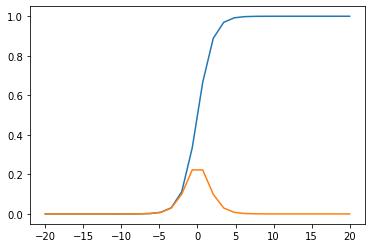

In [79]:
plt.plot(x.numpy(), sig.numpy())
plt.plot(x.numpy(), res.numpy())